<p style="font-weight:bold; letter-spacing: 2px; color:#F5F5DC; font-size:140%; text-align:left; max-width: 1050px; padding: 10px; border-bottom: 3px solid #D2B48C"> Decision Tree Classification</p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>🧠 Algorithm Intuition:</font></h3>

<ul>
    <li><i>Decision Trees</i> make use of decision rules to split training examples in to sub groups based on whether they pass a Yes / No statement about a particular attribute (feature). Splitting can occur over and over again if necessary, aiming to reduce the uncertainty or impurity of the sub groups with respect to the group from which they split. There is no probabilistic element and as such, no traditional objective (loss) function exists to determine the best parameters of the model.</li> 
    <li>The first node in all trees is called the "root node". From there, all nodes that results from downstream splits are called "internal nodes". Finally, nodes no longer split are called "leaf nodes". The pseudocode for building a tree treats each node and its duaghter nodes as a tree in itself, layering them at each node to chain together trees in to a final fully-constructed tree. It can be seen as a construction loop, with the same reasoning being called again and again each node. This is as follows: 
<ul>

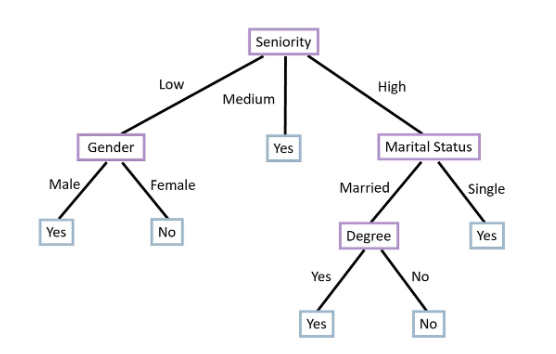
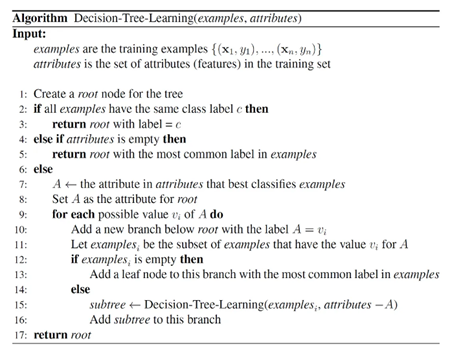

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>❔ Choosing Attributes for Splitting:</font></h3>

<ul>
    <li>To decide at each node which attribute to use for the split, the logic is simple. A good attribute splits the examples into purer subsets, i.e., subsets of the training examples are more homogenous in their class labels than when they were all together in their parent node.</li> 
    <li>Ideally, there is an attribute that splits into completely pure subsets. In many cases however, there must be a definition for "node impurity", a measure that will allow comparison of the quality of the splits of different attributes. Two approaches lead the field: <b>Entropy</b> and <b>Gini Index</b></li>
<ul>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>1. Entropy</font></h3>

<ul>
    <li>Entropy of a random variable is a measure of the uncertainty in its possible outcomes. The higher the uncertainty, the higher its entropy.</li>
    <li>With <i>p</i>(<i>xᵢ</i>)</i> being the probability of any given value of the random variate, the formula for entropy <i>H</i> is defined as below.</li>
    <li>The parallel of this to Decision Tree follows.</li>
<ul>

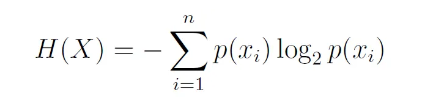
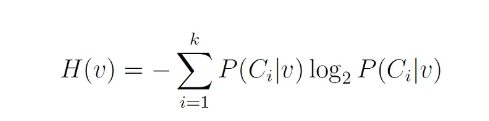

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>2. Gini Index</font></h3>

<ul>
    <li>As an alternative, "Gini Index" (or "Gini Impurity") measures how often a randomly chosen sample at a given node would be incorrectly labeled if it were labeled randomly according to the distribution of the classes at that node. With a more heterogenous class distribution, the probability of misclassification increases, as does its Gini index.</l>
    <li>With <i>pj</i> being the probability of any given class being mislabelled, the Gini index is computed by summing pairwise products of these probabilities for each class:</li>
<ul>

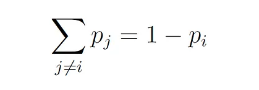
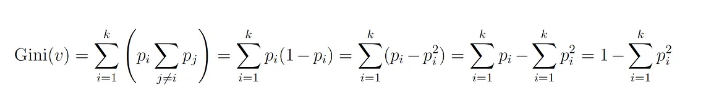

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💥 Information Gain:</font></h3>

<ul>
    <li>Information Gain is the goal of splitting. It measures the reduction in entropy / impurity at node <i>v</i> after splitting it into child nodes <i>v₁</i>, <i>v₂</i>, …, <i>vₖ</i>. In turn, each attribute is used to measure IG, the chosen one being the one with the highest IG. The formula is given below, as well as a worked example.</li>
<ul>

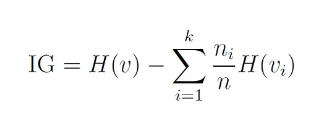

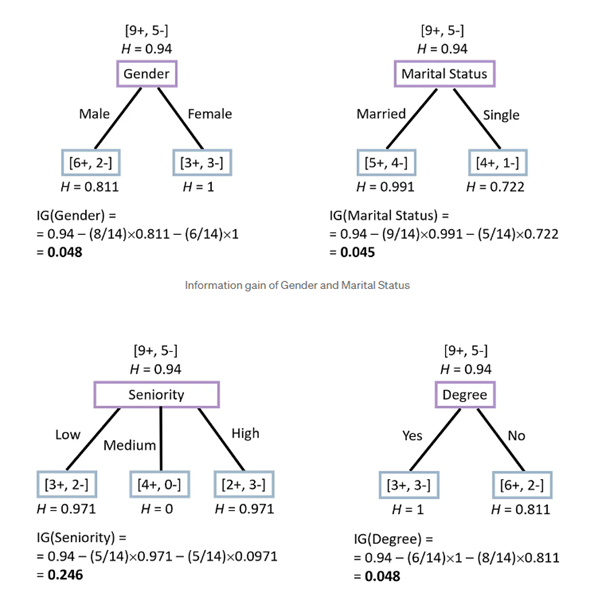

*Import Libraries*

In [41]:
# import custom classes, functions and variables. Reload file in to memory on cell excution.
import importlib
import settings
importlib.reload(settings)

# import data frameworks
import pandas as pd
import numpy as np

# import viz
import matplotlib.pyplot as plt
import seaborn as sns

# import ML
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as Pipeline_imb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
from imblearn.over_sampling import SMOTENC


# import others
import os
import pickle
import warnings

In [42]:
# Specific warning categories to be ignored
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

*Import data from initial EDA*

In [43]:
df = pd.read_csv(os.path.join(settings.DATA_EDA_DIR, settings.DATA_EDA_FILE), sep=",")
if len(df) > 0:
    print("df loaded")

df loaded


*Split data and prepare labels*

In [44]:
ALL_FEATURES = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 
                'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 
                'Daily Steps', 'Blood Pressure Category']
X = df[ALL_FEATURES]
y = df[settings.LABEL]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43, stratify=y)

In [45]:
# Encode y vector 
map = {"None":0, "Sleep Apnea":1, "Insomnia":2}
# apply mapping function
settings.column_mapper(y_train, "Sleep Disorder", map)
settings.column_mapper(y_test, "Sleep Disorder", map)

# check new values in consolidated column
# display(settings.examine_values(y_train).loc["Sleep Disorder",:])
# display(settings.examine_values(y_train).loc["Sleep Disorder",:])

In [46]:
# reshape labels to 1-D array (vector) 
y_train, y_test = y_train.values.reshape(-1), y_test.values.reshape(-1)

*Preprocess steps*

In [47]:
# Create a column transformer for ohe and scaling
column_trans = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), X_train.select_dtypes(include=['object']).columns),
        ('scale', StandardScaler(), X_train.select_dtypes(include=['float64', 'int64']).columns)
    ],
    remainder='passthrough')

transformed_X_train_array = column_trans.fit_transform(X_train)
transformed_X_test_array = column_trans.transform(X_test)

# Convert to df as a sense check. Use only for interpretibility before using for pipeline. 
transformed_X_train_df = settings.convert_transformed_features_to_df(column_trans, transformed_X_train_array)
transformed_X_test_df = settings.convert_transformed_features_to_df(column_trans, transformed_X_test_array)

# Check ohe and scaled datasets
# display("train: check for dummy encoded columns and scaled values (mean 0 and std 1)",transformed_X_train_df.shape, transformed_X_train_df.describe().loc[["mean", "std"],:])
# display("test: check for same dummy encoded columns and scaled values (mean close to 0 and std close to 1)",transformed_X_test_df.shape, transformed_X_test_df.describe().loc[["mean", "std"],:])

*Create pipeline and base model*

In [48]:
# create model
model_mlr = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42) # default solver "lgbgs" and penalty "l2"

# create sklearn pipeline
pipeline_mlr = settings.create_pipeline(["preprocess", column_trans], ["multinomial_logistic_regression", model_mlr])

# create cross validation object for cross_val_score
cv_mlr = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# run training cross validation on pipeline 
cv_scores = cross_val_score(pipeline_mlr, X_train, y_train, scoring='accuracy', cv=cv_mlr)
display(f'Mean CV Train Accuracy: {np.round(np.mean(cv_scores), 6)*100} %')

# fit pipeline and produce test score 
pipeline_mlr.fit(X_train, y_train)
display(f'Test Accuracy:{np.round(pipeline_mlr.score(X_test, y_test), 6)*100} %')

'Mean CV Train Accuracy: 90.9265 %'

'Test Accuracy:88.4956 %'

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

<ul>
    <li>Good baseline model train cv accuracy ~ 91% and test ~88%</li>
</ul>
</div>


In [49]:
# Save baseline pipeline to file  
settings.save_pipeline("best_multinomial_logistic_regression_pipeline.pkl", pipeline_mlr)

*Hyperparam tuning*

*Regularisation*

In [50]:
# set up param grid
param_grid_mlr = {
    'multinomial_logistic_regression__penalty': ['l2', "none"] # l1 not typically used for multinomial due to compuataional and interpretibility challenges
}

# Create and fit GridSearchCV object on train data
grid_search_mlr = GridSearchCV(pipeline_mlr, param_grid=param_grid_mlr, scoring='accuracy', cv=cv_mlr, n_jobs=-1)
grid_search_mlr.fit(X_train, y_train)

# Access best hyperparameters and accuracy score
best_params, best_train_score = grid_search_mlr.best_params_, grid_search_mlr.best_score_

# Print the best parameters
display("Best Parameters:", pd.DataFrame(best_params, index=[0]))

# Print the best mean cv training score
print("Mean CV Train Accuracy with best parameters:", settings.score_formatter(best_train_score, 4))

# Evaluate the best model on the test set
best_pipeline = grid_search_mlr.best_estimator_
test_accuracy = best_pipeline.score(X_test, y_test)
print("Test Accuracy with best parameters:", settings.score_formatter(test_accuracy, 4))

# Time to convergence 
print("Iterations to convergence:", best_pipeline['multinomial_logistic_regression'].n_iter_[0])


'Best Parameters:'

,multinomial_logistic_regression__penalty
0,l2


Mean CV Train Accuracy with best parameters: 90.9300 %
Test Accuracy with best parameters: 88.5000 %
Iterations to convergence: 51


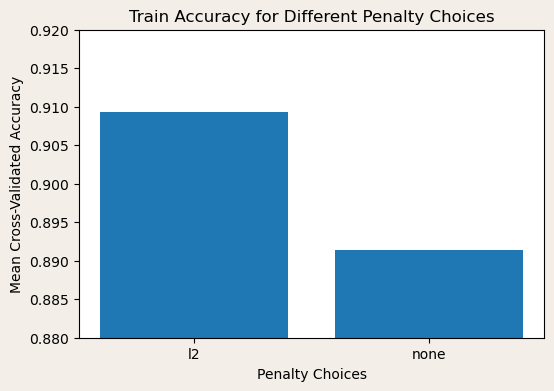

In [51]:
# Access the grid search results
results = grid_search_mlr.cv_results_

# Extract C values and accuracy scores
penalty_values = results['param_multinomial_logistic_regression__penalty'].data
mean_test_scores = results['mean_test_score']

# Plot the accuracy scores against penalty choices
fig, ax = plt.subplots(figsize=(6, 4), gridspec_kw={'hspace': 0.8}, facecolor="#F3EEE7")
ax.bar(penalty_values, mean_test_scores)

# Add plot details
ax.set_ylim(0.88, 0.92)
ax.set_xlabel('Penalty Choices')
ax.set_ylabel('Mean Cross-Validated Accuracy')
ax.set_title('Train Accuracy for Different Penalty Choices')
plt.show()


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

<ul>
    <li>Regularisation providing slightly higher score compared to none. Both will be tested with further tuning</li>
</ul>
</div>


*Perform full param search*

In [52]:
# set up param grid
param_grid_mlr = {
    'multinomial_logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100], # default = 1 (moderate)
    'multinomial_logistic_regression__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], # default = lbfgs 
    'multinomial_logistic_regression__penalty': ['l2', 'none'] # default = l2
}

# Create and fit GridSearchCV object on train data
grid_search_mlr = GridSearchCV(pipeline_mlr, param_grid=param_grid_mlr, scoring='accuracy', cv=cv_mlr, n_jobs = -1)
grid_search_mlr.fit(X_train, y_train)

# Access best hyperparameters and accuracy score
best_params, best_train_score = grid_search_mlr.best_params_, grid_search_mlr.best_score_

# Print the best parameters
display("Best Parameters:", pd.DataFrame(best_params, index=[0]))

# Print the best mean cv training score
print("Mean CV Train Accuracy with best parameters:", settings.score_formatter(best_train_score, 4))

# Evaluate the best model on the test set
best_pipeline = grid_search_mlr.best_estimator_
test_accuracy = best_pipeline.score(X_test, y_test)
print("Test Accuracy with best parameters:", settings.score_formatter(test_accuracy, 4))

# Time to convergence 
print("Iterations to convergence:", best_pipeline['multinomial_logistic_regression'].n_iter_[0])

'Best Parameters:'

,multinomial_logistic_regression__C,multinomial_logistic_regression__penalty,multinomial_logistic_regression__solver
0,1,l2,newton-cg


Mean CV Train Accuracy with best parameters: 90.9300 %
Test Accuracy with best parameters: 88.5000 %


NameError: name 'best_model' is not defined

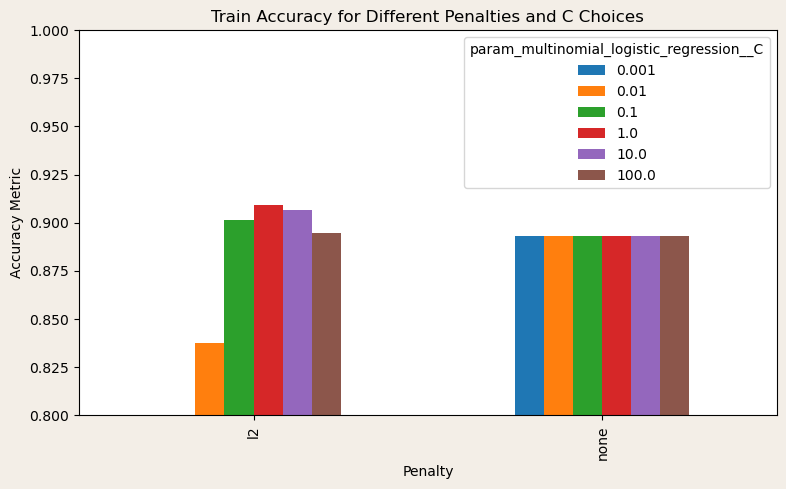

In [59]:
# Access the latest grid search results
results = grid_search_mlr.cv_results_

# Extract penalty, C values and accuracy scores
grouped = pd.DataFrame(results).groupby(["param_multinomial_logistic_regression__penalty","param_multinomial_logistic_regression__C"])["mean_test_score"].mean().unstack()

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(6, 4), gridspec_kw={'hspace': 0.8}, facecolor="#F3EEE7")
grouped.plot(kind='bar', figsize=(9, 5), ax=ax)

# Add plot details
ax.set_ylim(0.8, 1)
ax.set_xlabel('Penalty')
ax.set_ylabel('Accuracy Metric')
ax.set_title('Train Accuracy for Different Penalties and C Choices')
plt.show()

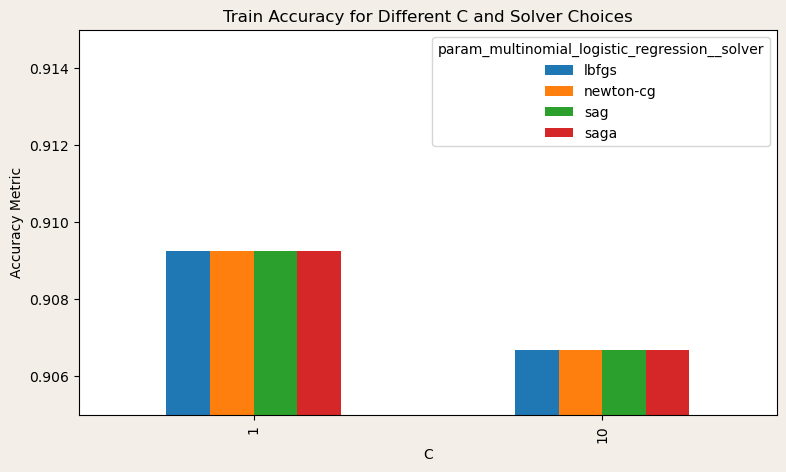

In [60]:
# Extract penalty, C values and accuracy scores
grouped = pd.DataFrame(results)
grouped = grouped[
    (grouped["param_multinomial_logistic_regression__penalty"] == "l2") &
    ((grouped["param_multinomial_logistic_regression__C"] == 1) | (grouped["param_multinomial_logistic_regression__C"] == 10))
].groupby(["param_multinomial_logistic_regression__C", "param_multinomial_logistic_regression__solver"])["mean_test_score"].mean().unstack()

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(6, 4), gridspec_kw={'hspace': 0.8}, facecolor="#F3EEE7")
grouped.plot(kind='bar', figsize=(9, 5), ax=ax)

# Add plot details
ax.set_ylim(0.905, 0.915)
ax.set_xlabel('C')
ax.set_ylabel('Accuracy Metric')
ax.set_title('Train Accuracy for Different C and Solver Choices')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

<ul>
    <li>Averaged across all 4 solvers, Regularisation providing higher scores compared to none only for specific strengths (C). This is the case for noteably range of 0.1 to 10</li>
    <li>newton-cg identified as best solver although there is no difference in optimal C range: newton first in param list hence why chosen. Default lbfgs will remain.</li>
</ul>
</div>


*Narrow down C param*

In [120]:
# Refine model and update pipeline
model_mlr = LogisticRegression(multi_class='multinomial', solver="lbfgs", penalty="l2", max_iter=1000, random_state=42) 
pipeline_mlr = settings.create_pipeline(["preprocess", column_trans], ["multinomial_logistic_regression", model_mlr])

# set up param grid
param_grid_mlr = {
    'multinomial_logistic_regression__C': np.linspace(0.1, 10, 200), # large sweep of C values
}

# Create and fit GridSearchCV object on training data
grid_search_mlr = GridSearchCV(pipeline_mlr, param_grid=param_grid_mlr, scoring='accuracy', cv=cv_mlr, n_jobs=-1)
grid_search_mlr.fit(X_train, y_train)

# Access best hyperparameters and accuracy score
best_params, best_train_score = grid_search_mlr.best_params_, grid_search_mlr.best_score_

# Print the best parameters
display("Best Parameters:", pd.DataFrame(best_params, index=[0]))

# Print the best mean cv training score
print("Mean CV Train Accuracy with best parameters:", settings.score_formatter(best_train_score, 4))

# Evaluate the best model on the test set
best_pipeline = grid_search_mlr.best_estimator_
test_accuracy = best_pipeline.score(X_test, y_test)
print("Test Accuracy with best parameters:", settings.score_formatter(test_accuracy, 4))

# Time to convergence 
print("Iterations to convergence:", best_model['multinomial_logistic_regression'].n_iter_[0])

'Best Parameters:'

,multinomial_logistic_regression__C
0,2.637186


Mean CV Train Accuracy with best parameters: 91.05 %
Test Accuracy with best parameters: 89.38000000000001 %
Iterations to convergence: 77


<div style="border-radius: 10px; border: #DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size: 100%; text-align: left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

<ul style="list-style-type: none; padding-left: 0;">
    <li style="line-height: 0.1;">
        Best C param across exhaustive grid search is actually all values between ~2.6 and ~5. This is shown by the following code:
        <br>
        <pre style="margin: 0; padding: 10px; border-radius: 5px; background-color: #f7f7f7;">
            <code style="color: #000000; display: block; margin-left: 0; padding-left: 0;">
df = pd.DataFrame(grid_search_mlr.cv_results_)
result = pd.DataFrame(df.groupby("param_multinomial_logistic_regression__C")["mean_test_score"].mean())
            </code>
        </pre>
        Let's select 3.
    </li>
</ul>
<ul>
    <li>Hypertuning slightly improves cv mean train score (and test score).</li>
</ul>


</div>


In [121]:
# Tuning finished: refine model, update and fit pipeline for saving
model_mlr = LogisticRegression(multi_class='multinomial', solver="lbfgs", penalty="l2", C=3, max_iter=1000, random_state=42) 
pipeline_mlr = settings.create_pipeline(["preprocess", column_trans], ["multinomial_logistic_regression", model_mlr])
pipeline_mlr.fit(X_train, y_train)

# save hypertuned pipeline, verifying better test score
current_best_pipeline = settings.get_saved_pipeline("best_multinomial_logistic_regression_pipeline.pkl")
if current_best_pipeline.score(X_test, y_test) < pipeline_mlr.score(X_test, y_test):
    settings.save_pipeline("best_multinomial_logistic_regression_pipeline.pkl", pipeline_mlr)


*Review metrics for hypertuned model*

In [127]:
# Print test accuracy
print("Test Accuracy:", settings.score_formatter(pipeline_mlr.score(X_test, y_test), 5))

# Generate prediction and show classification report
y_pred = pipeline_mlr.predict(X_test)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

Test Accuracy: 89.381 %

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        66
           1       0.79      0.79      0.79        24
           2       0.83      0.83      0.83        23

    accuracy                           0.89       113
   macro avg       0.86      0.86      0.86       113
weighted avg       0.89      0.89      0.89       113



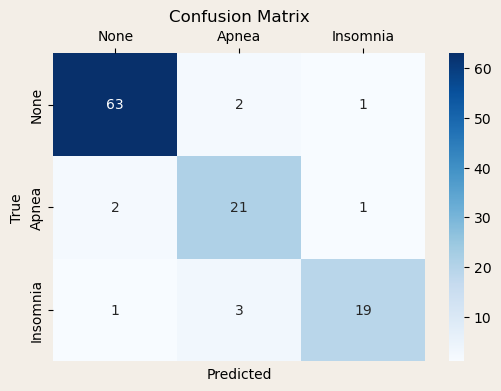

In [145]:
# Generate confusion matrix
class_labels = ["None","Apnea","Insomnia"]
conf_matrix = confusion_matrix(y_test, y_pred)

settings.plot_conf_matrix(class_labels, conf_matrix)

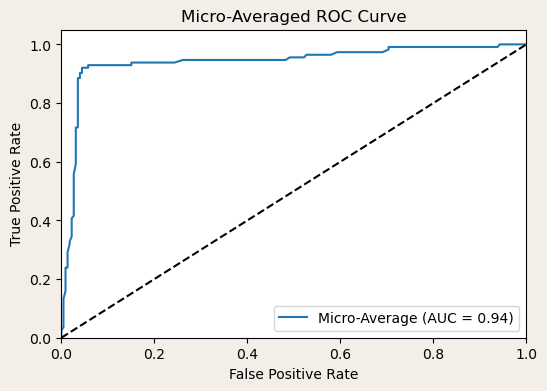

In [153]:
# Predict class probabilities for test data
y_probs = pipeline_mlr.predict_proba(X_test)

# Compute micro-averaged ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(np.eye(len(class_labels))[y_test].ravel(), y_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

settings.plot_micro_averaged_roc(fpr_micro, tpr_micro, roc_auc_micro)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

<ul>
    <li>Accuracy is generally good at ~89% test set and average AUC is high at 95%</li>
    <li>Recall and Precision is better for class 0 ("None") (95%) than those of the sleep disorders</li>
    <li>Apnea has the lowest recall and precision at 79% (5 incorrect out of test 23 instances)</li>
    <li>Insomnia has recall and precision at 83% (5 incorrect out of 24 instances)</li>
</ul>
</div>


*Addressing Class Imbalance: Exploring SMOTE-NC*

In [25]:
# instantiate SMOTENC object with categorical indicies of transformed X_train dataset
categorical_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

# Proving smote object works using the X array transformed by column_trans
from collections import Counter
smote_x, smote_y = smote_nc.fit_resample(transformed_X_train_df, y_train)
print(f"Original class counts: {Counter(y_train)}")
print(f"New class counts: {Counter(smote_y)}")

Original class counts: Counter({0: 153, 1: 54, 2: 54})
New class counts: Counter({0: 153, 1: 153, 2: 153})


In [136]:
# Set up pipeline using imblearn's Pipeline class (SMOTE not compatible with sklearn's Pipeline)
# Reuse model with tuned hyperparameters
steps = [('column_trans', column_trans), ('smote', smote_nc), ('multinomial_logistic_regression', model_mlr)]
pipeline_mlr = Pipeline_imb(steps)

# Run cross validation on pipeline with train data 
cv_scores = cross_val_score(pipeline_mlr, X_train, y_train, scoring='accuracy', cv=cv_mlr)
print('Mean CV Train Accuracy:', settings.score_formatter(np.mean(cv_scores), 4))

# Fit pipeline with train data and generate test score using model step only (no smote for test)
pipeline_mlr.fit(X_train, y_train)
model_mlr = pipeline_mlr.named_steps['multinomial_logistic_regression']
print('Test Accuracy:', settings.score_formatter(model_mlr.score(transformed_X_test_df.values, y_test), 3))


Mean CV Train Accuracy: 91.05 %
Test Accuracy: 91.2 %


In [139]:
# Generate prediction and show classification report
y_pred = model_mlr.predict(transformed_X_test_df.values)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        66
           1       0.81      0.88      0.84        24
           2       0.90      0.83      0.86        23

    accuracy                           0.91       113
   macro avg       0.89      0.89      0.89       113
weighted avg       0.91      0.91      0.91       113



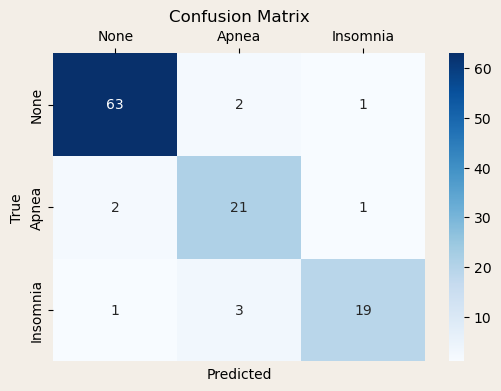

In [146]:
class_labels = ["None","Apnea","Insomnia"]
conf_matrix = confusion_matrix(y_test, y_pred)

settings.plot_conf_matrix(class_labels, conf_matrix)


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

<ul>
    <li>SMOTE shows improvement: Recall of Apnea improves by 8% where model makes fewer mistakes classifying Apnea as Insmonia(2 predictions)</li>
</ul>
</div>


In [154]:
# save smote hypertuned pipeline, verifying better test score
current_best_pipeline = settings.get_saved_pipeline("best_multinomial_logistic_regression_pipeline.pkl")
if current_best_pipeline.score(X_test, y_test) < pipeline_mlr.named_steps['multinomial_logistic_regression'].score(transformed_X_test_df.values, y_test):
    settings.save_pipeline("best_multinomial_logistic_regression_pipeline.pkl", pipeline_mlr)

*Testing new features*

*Binning age and dropping original Age*

In [234]:
# re-initialise X array for all features before modification
X = df[settings.ALL_FEATURES]

# Bin age to new column and drop age column
X.loc[:,'Age_bin'] = pd.cut(X.loc[:,'Age'], [20, 30, 40, 50, 60], labels=['20s', '30s', '40s', '50s']).astype("object")
settings.examine_values(X).loc["Age_bin",:]
X = X.drop("Age", axis=1)

C:\Users\adams\AppData\Local\Temp\ipykernel_10420\1932734524.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'Age_bin'] = pd.cut(X.loc[:,'Age'], [20, 30, 40, 50, 60], labels=['20s', '30s', '40s', '50s']).astype("object")


*Split data*

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43, stratify=y)

In [237]:
# Encode y vector 
map = {"None":0, "Sleep Apnea":1, "Insomnia":2}
# apply mapping function
settings.column_mapper(y_train, "Sleep Disorder", map)
settings.column_mapper(y_test, "Sleep Disorder", map)

# reshape labels to 1-D array (vector) 
y_train, y_test = y_train.values.reshape(-1), y_test.values.reshape(-1)

*Baseline model*

In [238]:
# Create a column transformer for ohe and scaling
column_trans = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), X_train.select_dtypes(include=['object']).columns),
        ('scale', StandardScaler(), X_train.select_dtypes(include=['float64', 'int64']).columns)
    ],
    remainder='passthrough')
    
# create model
model_mlr = LogisticRegression(multi_class='multinomial', max_iter=1000, C=3, random_state=42) # default solver "lgbgs" and penalty "l2"

# create sklearn pipeline
pipeline_mlr = settings.create_pipeline(["preprocess", column_trans], ["multinomial_logistic_regression", model_mlr])

# create cross validation object for cross_val_score
cv_mlr = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# run training cross validation on pipeline 
cv_scores = cross_val_score(pipeline_mlr, X_train, y_train, scoring='accuracy', cv=cv_mlr)
display(f'Mean CV Train Accuracy: {np.round(np.mean(cv_scores), 6)*100} %')

# fit pipeline and produce test score 
pipeline_mlr.fit(X_train, y_train)
display(f'Test Accuracy:{np.round(pipeline_mlr.score(X_test, y_test), 6)*100} %')

'Mean CV Train Accuracy: 91.1805 %'

'Test Accuracy:89.3805 %'

In [242]:
# set up param grid
param_grid_mlr = {
    'multinomial_logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100], # default = 1 (moderate)
    'multinomial_logistic_regression__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], # default = lbfgs 
    'multinomial_logistic_regression__penalty': ['l2', 'none'] # default = l2
}

# Create and fit GridSearchCV object on train data
grid_search_mlr = GridSearchCV(pipeline_mlr, param_grid=param_grid_mlr, scoring='accuracy', cv=cv_mlr, n_jobs = -1)
grid_search_mlr.fit(X_train, y_train)

settings.get_gridsearchcv_summary(grid_search_mlr, 4, X_test, y_test)


'Best Parameters:'

,multinomial_logistic_regression__C,multinomial_logistic_regression__penalty,multinomial_logistic_regression__solver
0,1,l2,newton-cg


Mean CV Train Accuracy with best parameters: 91.1800 %
Test Accuracy with best parameters: 88.5000 %
Iterations to convergence: 77


In [ ]:
# Refine model and update pipeline
model_mlr = LogisticRegression(multi_class='multinomial', solver="lbfgs", penalty="l2", max_iter=1000, random_state=42) 
pipeline_mlr = settings.create_pipeline(["preprocess", column_trans], ["multinomial_logistic_regression", model_mlr])

# set up param grid
param_grid_mlr = {
    'multinomial_logistic_regression__C': np.linspace(0.1, 10, 200), # large sweep of C values
}

# Create and fit GridSearchCV object on training data
grid_search_mlr = GridSearchCV(pipeline_mlr, param_grid=param_grid_mlr, scoring='accuracy', cv=cv_mlr, n_jobs=-1)
grid_search_mlr.fit(X_train, y_train)

settings.get_gridsearchcv_summary(grid_search_mlr, 4, X_test, y_test)


In [241]:
# Refine model
model_mlr = LogisticRegression(multi_class='multinomial', solver="lbfgs", penalty="l2", C = 0.4, max_iter=1000, random_state=42) 

# instantiate SMOTENC object with categorical indicies of transformed X_train dataset
categorical_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

# Set up pipeline using imblearn's Pipeline class (SMOTE not compatible with sklearn's Pipeline)
# Reuse model with tuned hyperparameters
steps = [('column_trans', column_trans), ('smote', smote_nc), ('multinomial_logistic_regression', model_mlr)]
pipeline_mlr = Pipeline_imb(steps)

# Run cross validation on pipeline with train data 
cv_scores = cross_val_score(pipeline_mlr, X_train, y_train, scoring='accuracy', cv=cv_mlr)
print('Mean CV Train Accuracy:', settings.score_formatter(np.mean(cv_scores), 4))

# Fit pipeline with train data and generate test score using model step only (no smote for test)
pipeline_mlr.fit(X_train, y_train)
model_mlr = pipeline_mlr.named_steps['multinomial_logistic_regression']
print('Test Accuracy:', settings.score_formatter(model_mlr.score(transformed_X_test_df.values, y_test), 3))


Mean CV Train Accuracy: 91.0500 %
Test Accuracy: 88.500 %


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

<ul>
    <li>Age binning doesn't improve on best model</li>
</ul>
</div>


*Dropping highly correlated features*

In [280]:
# re-initialise X array for all features before modification
X = df[settings.ALL_FEATURES]

# Drop age to new column and drop age column
X = X.drop(["Quality of Sleep", "Stress Level"], axis=1) # "Quality of Sleep", "Stress Level"

*Split data*

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43, stratify=y)

In [282]:
# Encode y vector 
map = {"None":0, "Sleep Apnea":1, "Insomnia":2}
# apply mapping function
settings.column_mapper(y_train, "Sleep Disorder", map)
settings.column_mapper(y_test, "Sleep Disorder", map)

# reshape labels to 1-D array (vector) 
y_train, y_test = y_train.values.reshape(-1), y_test.values.reshape(-1)

*Baseline model*

In [283]:
# Create a column transformer for ohe and scaling
column_trans = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), X_train.select_dtypes(include=['object']).columns),
        ('scale', StandardScaler(), X_train.select_dtypes(include=['float64', 'int64']).columns)
    ],
    remainder='passthrough')
    
# create model
model_mlr = LogisticRegression(multi_class='multinomial', max_iter=1000, C=3, random_state=42) # default solver "lgbgs" and penalty "l2"

# create sklearn pipeline
pipeline_mlr = settings.create_pipeline(["preprocess", column_trans], ["multinomial_logistic_regression", model_mlr])

# create cross validation object for cross_val_score
cv_mlr = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# run training cross validation on pipeline 
cv_scores = cross_val_score(pipeline_mlr, X_train, y_train, scoring='accuracy', cv=cv_mlr)
display(f'Mean CV Train Accuracy: {np.round(np.mean(cv_scores), 6)*100} %')

# fit pipeline and produce test score 
pipeline_mlr.fit(X_train, y_train)
display(f'Test Accuracy:{np.round(pipeline_mlr.score(X_test, y_test), 6)*100} %')

'Mean CV Train Accuracy: 91.1805 %'

'Test Accuracy:91.1504 %'

In [284]:
# set up param grid
param_grid_mlr = {
    'multinomial_logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100], # default = 1 (moderate)
    'multinomial_logistic_regression__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], # default = lbfgs 
    'multinomial_logistic_regression__penalty': ['l2', 'none'] # default = l2
}

# Create and fit GridSearchCV object on train data
grid_search_mlr = GridSearchCV(pipeline_mlr, param_grid=param_grid_mlr, scoring='accuracy', cv=cv_mlr, n_jobs = -1)
grid_search_mlr.fit(X_train, y_train)

settings.get_gridsearchcv_summary(grid_search_mlr, 4, X_test, y_test)


'Best Parameters:'

,multinomial_logistic_regression__C,multinomial_logistic_regression__penalty,multinomial_logistic_regression__solver
0,1,l2,newton-cg


Mean CV Train Accuracy with best parameters: 91.1800 %
Test Accuracy with best parameters: 88.5000 %


In [285]:
# Refine model and update pipeline
model_mlr = LogisticRegression(multi_class='multinomial', solver="lbfgs", penalty="l2", max_iter=1000, random_state=42) 
pipeline_mlr = settings.create_pipeline(["preprocess", column_trans], ["multinomial_logistic_regression", model_mlr])

# set up param grid
param_grid_mlr = {
    'multinomial_logistic_regression__C': np.linspace(0.1, 10, 200), # large sweep of C values
}

# Create and fit GridSearchCV object on training data
grid_search_mlr = GridSearchCV(pipeline_mlr, param_grid=param_grid_mlr, scoring='accuracy', cv=cv_mlr, n_jobs=-1)
grid_search_mlr.fit(X_train, y_train)

settings.get_gridsearchcv_summary(grid_search_mlr, 4, X_test, y_test)


'Best Parameters:'

,multinomial_logistic_regression__C
0,2.338693


Mean CV Train Accuracy with best parameters: 91.3100 %
Test Accuracy with best parameters: 88.5000 %


In [287]:
# Refine model
model_mlr = LogisticRegression(multi_class='multinomial', solver="lbfgs", penalty="l2", C = 2.4, max_iter=1000, random_state=42) 

# instantiate SMOTENC object with categorical indicies of transformed X_train dataset
categorical_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

# Set up pipeline using imblearn's Pipeline class (SMOTE not compatible with sklearn's Pipeline)
# Reuse model with tuned hyperparameters
steps = [('column_trans', column_trans), ('smote', smote_nc), ('multinomial_logistic_regression', model_mlr)]
pipeline_mlr = Pipeline_imb(steps)

# Run cross validation on pipeline with train data 
cv_scores = cross_val_score(pipeline_mlr, X_train, y_train, scoring='accuracy', cv=cv_mlr)
print('Mean CV Train Accuracy:', settings.score_formatter(np.mean(cv_scores), 4))
666666666
# Fit pipeline with train data and generate test score using model step only (no smote for test)
pipeline_mlr.fit(X_train, y_train)
model_mlr = pipeline_mlr.named_steps['multinomial_logistic_regression']
print('Test Accuracy:', settings.score_formatter(model_mlr.score(transformed_X_test_df.values, y_test), 3))


Mean CV Train Accuracy: 91.5700 %
Test Accuracy: 85.000 %


https://www.kaggle.com/code/jillanisofttech/sleep-health-and-lifestyle-predication-with-94-ac

- KNN (deminensionality reduction needed)